# 2020 Rolex 24 Hours of Daytona

## All-Cars Plot  
Data from [IMSA Results](http://results.imsa.com/). "Time Cards" csv is cumulative since the start. Read in most recent time card file for updated plots.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
from matplotlib.dates import date2num, datestr2num, num2date
from datetime import timedelta  
pd.plotting.register_matplotlib_converters()
mpl.rcParams['font.sans-serif'] = "AppleGothic"
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

In [54]:
data = pd.read_csv("./data/t18.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False).fillna(0)
timeformat = '%H:%M:%S.%f'
data['time'] = pd.to_datetime(data.loc[:,'HOUR'], format=timeformat)
#add a day to values before start time
data.loc[(data['time'] < data.iloc[1,:].loc['time']) & (data['LAP_NUMBER'] > 1),'time'] = data.loc[(data['time'] < data.iloc[1,:].loc['time']) & (data['LAP_NUMBER'] > 1),'time'] + (timedelta(days=1))
data = data.fillna(0)
data = data.loc[data['LAP_NUMBER'] > 2]
data.head(2)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,Unnamed: 25,time
2,10,1,3,1:36.800,0,0,32.092,0,36.228,0,28.480,0,213.1,4:54.167,13:45:41.080,0:32.092,0:36.228,0:28.480,0.0,Ryan Briscoe,0,DPi,0.0,Konica Minolta Cadillac DPi-V.R,Cadillac,0.0,1900-01-01 13:45:41.080000000
3,10,1,4,1:36.346,0,0,31.815,0,36.207,0,28.324,0,214.1,6:30.513,13:47:17.426,0:31.815,0:36.207,0:28.324,0.0,Ryan Briscoe,0,DPi,0.0,Konica Minolta Cadillac DPi-V.R,Cadillac,0.0,1900-01-01 13:47:17.425999872


In [55]:
data.loc[(data['NUMBER'] == 77) & (data['LAP_NUMBER'] < 5)].shape

(2, 27)

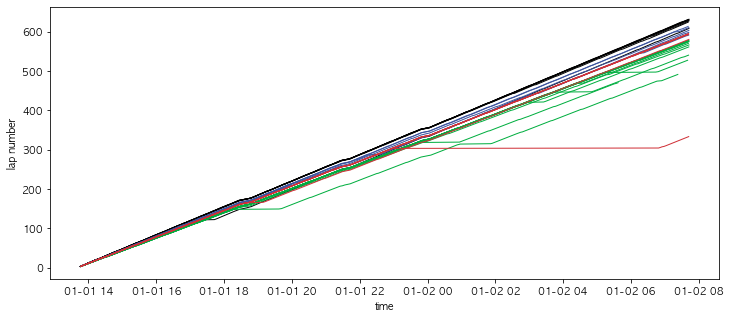

In [56]:
# all cars
fig = plt.subplots(figsize=(12,5))
classes = ("DPi", "GTD", "LMP2", "GTLM")
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
for c in classes:
    temp = data.loc[data['CLASS'] == c]
    color = colors.get(c, '#D3D3D3')
    for i in  temp['NUMBER'].unique():
        plotdata = temp.loc[data['NUMBER'] == i]
        plt.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1,\
                     color=color)
plt.ylabel("lap number")
plt.xlabel("time");
#plt.xlim(datetime.strptime("22:01:01.0", timeformat),datetime.strptime("22:51:01.0", timeformat))
#plt.ylim(240,320)

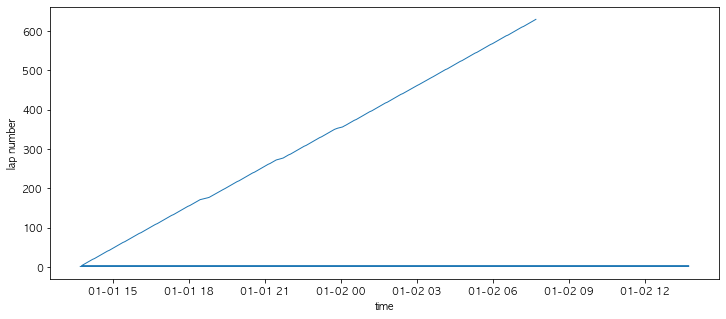

In [31]:
# one car
fig = plt.subplots(figsize=(12,5))
plotdata = data.loc[data['NUMBER'] == 77]
plt.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1)
plt.ylabel("lap number")
plt.xlabel("time");


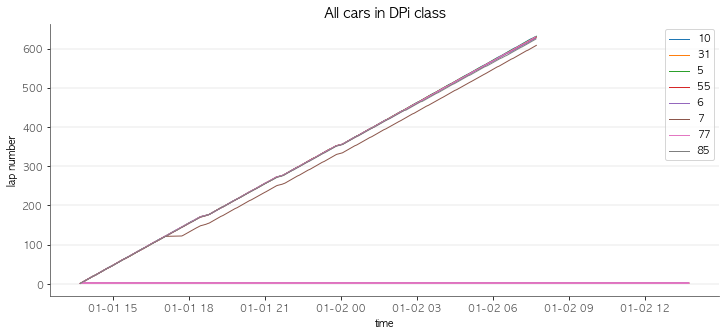

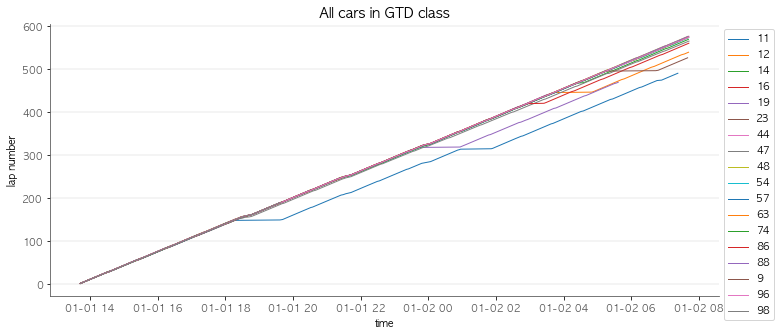

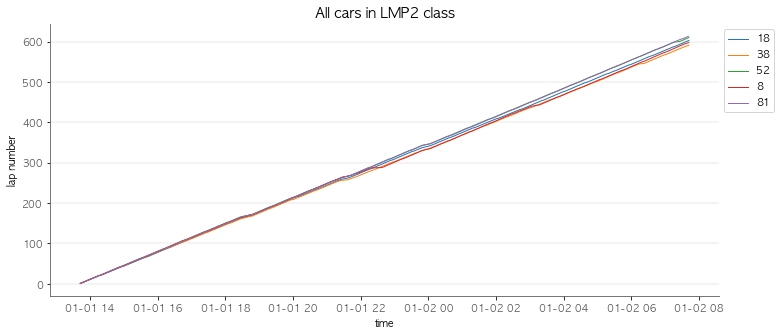

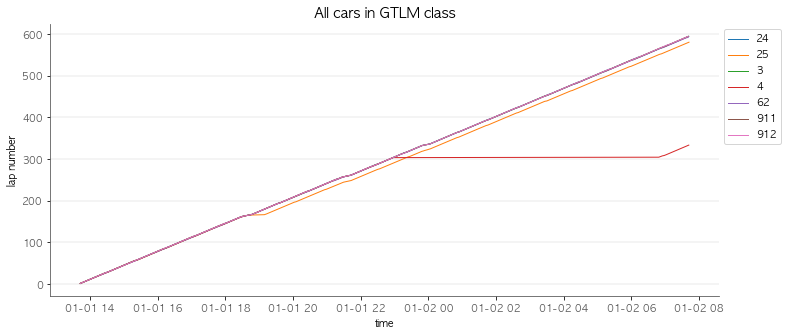

In [15]:
# plots for each class
classes = ("DPi", "GTD", "LMP2", "GTLM")
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
for c in classes:
    fig, ax = plt.subplots(figsize=(12,5))
    temp = data.loc[data['CLASS'] == c]
    color = colors.get(c, '#D3D3D3')
    for i in  temp['NUMBER'].unique():
        plotdata = temp.loc[data['NUMBER'] == i]
        ax.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1)
    plt.ylabel("lap number")
    plt.xlabel("time")
    #plt.xlim(datetime.strptime("22:01:01.0", timeformat),datetime.strptime("22:51:01.0", timeformat))
    #plt.ylim(240,320)
    ax.legend(bbox_to_anchor=(1, 1), fancybox=True)
    title = "All cars in " + c + " class"
    ax.set_title(title, fontsize=14, y=1)
    ax.tick_params(labelcolor='#565656')
    ax.spines['bottom'].set_color('#565656')
    ax.spines['left'].set_color('#565656')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='#565656', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.show()
    plt.close(fig)

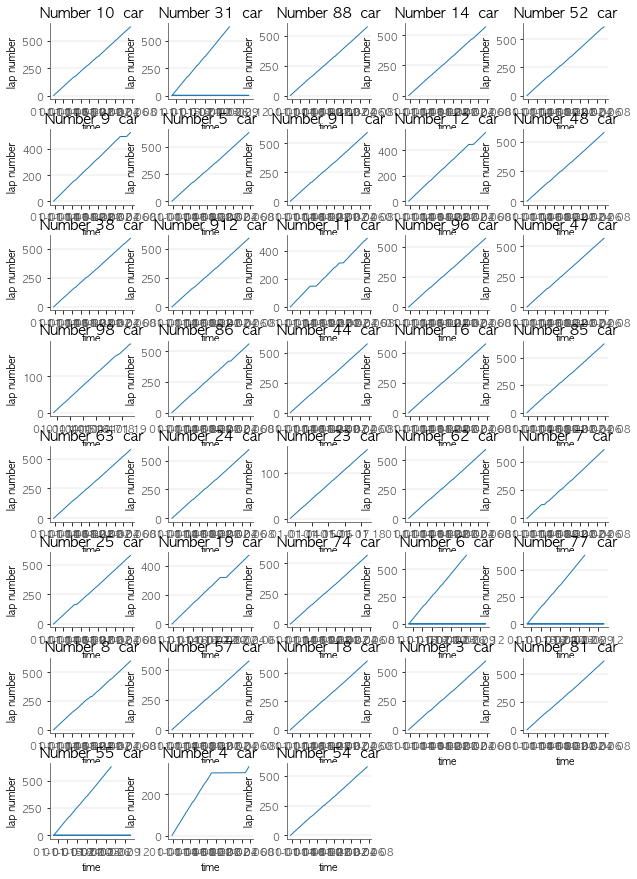

In [49]:
# plot for each car
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
data = data.sort_values(by='LAP_NUMBER')
fig = plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 0
for r in data['NUMBER'].unique():
    #fig, ax = plt.subplots(figsize=(5,3))
    i = i + 1
    ax = fig.add_subplot(8, 5, i)
    plotdata = data.loc[data['NUMBER'] == r]
    color = colors.get(c, '#D3D3D3')
    ax.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1)
    plt.ylabel("lap number")
    plt.xlabel("time")
    title = "Number " + str(r) + "  car"
    ax.set_title(title, fontsize=14, y=1)
    ax.tick_params(labelcolor='#565656')
    ax.spines['bottom'].set_color('#565656')
    ax.spines['left'].set_color('#565656')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='#565656', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()
plt.close(fig)

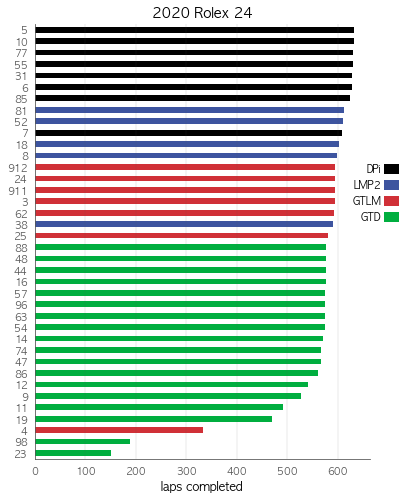

In [5]:
bardata = data[['NUMBER','CLASS','LAP_NUMBER']].groupby('NUMBER').max().reset_index().sort_values(by='LAP_NUMBER')
fig, ax2 = plt.subplots(figsize=(6,8))
bardata.plot.barh(x='NUMBER', y='LAP_NUMBER', ax=ax2, grid=False, legend=False, edgecolor = "none",\
                 color=[colors.get(i, '#D3D3D3') for i in bardata['CLASS']])
#ax2.legend(handles=patches, bbox_to_anchor=(1, 0), framealpha=0, markerfirst=False, \
#          loc='lower right', ncol=1, numpoints=1, fancybox=True, handlelength=.5)
ax2.tick_params(labelcolor='#565656')
ax2.set_xlabel('laps completed', fontsize=12)
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.yaxis.label.set_visible(False)
ax2.set_title('2020 Rolex 24', fontsize=14, y=1)
ax2.spines['bottom'].set_color('#565656')
ax2.spines['left'].set_color('#565656')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(color='#565656', axis='x', linestyle='-', linewidth=0.25, alpha=0.5)
# legend
hues = ["k", "#3d549f", "#d03037", "#00ae3f"]
texts = ["DPi", "LMP2", "GTLM", "GTD"]
patches = [ plt.plot([],[], color=hues[i], linewidth=10,\
                     label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax2.legend(handles=patches, bbox_to_anchor=(1.1, .7), framealpha=0, markerfirst=False, \
          loc='upper right', ncol=1, numpoints=1, fancybox=True, handlelength=.5);